In [ ]:
import pandas as pd
years=[2020, 2021, 2022, 2023]
vaers_data_combined={}
#data can be getting from https://vaers.hhs.gov/data/datasets.html 
#merge data to one file
for year in years:
    datatemp=f'data/{year}VAERSDATA.csv'
    vactemp=f'data/{year}VAERSVAX.csv'
    #load data with special encoding
    datadata=pd.read_csv(datatemp, encoding='ISO-8859-1')
    vacdata=pd.read_csv(vactemp, encoding='ISO-8859-1')
    #merge by id
    mergedalldata=datadata.merge(vacdata, on='VAERS_ID', how='left')
    vaers_data_combined[year]=mergedalldata
alldata=pd.concat(vaers_data_combined.values(), ignore_index=True)

# display
print(alldata.shape[0])
print(alldata.head())


C:\Users\ruitongs\AppData\Local\Temp\ipykernel_6824\237418770.py:9: DtypeWarning: Columns (7,9,10,12,15,16,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  datadata=pd.read_csv(datatemp, encoding='ISO-8859-1')
C:\Users\ruitongs\AppData\Local\Temp\ipykernel_6824\237418770.py:9: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  datadata=pd.read_csv(datatemp, encoding='ISO-8859-1')
C:\Users\ruitongs\AppData\Local\Temp\ipykernel_6824\237418770.py:9: DtypeWarning: Columns (7,12,23) have mixed types. Specify dtype option on import or set low_memory=False.
  datadata=pd.read_csv(datatemp, encoding='ISO-8859-1')


1268486
   VAERS_ID  RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
0    855017  1/1/2020    HI     55.0     55.0      NaN   F      NaN   
1    855018  1/1/2020    WI     68.0     68.0      NaN   F      NaN   
2    855019  1/1/2020   NaN     50.0     50.0      NaN   F      NaN   
3    855020  1/1/2020    TX     67.0     67.0      NaN   F      NaN   
4    855021  1/1/2020   NaN     73.0     73.0      NaN   F      NaN   

                                        SYMPTOM_TEXT DIED  ... OFC_VISIT  \
0  Symptoms occurred almost immediately- aching j...  NaN  ...       NaN   
1  Extreme pain, muscle weakness in right arm so ...  NaN  ...         Y   
2            SORENESS IN THE AREA.  ITCHING AND RASH  NaN  ...       NaN   
3  sore arm,  fever 101 , chills, and aching musc...  NaN  ...       NaN   
4  Patient presented to Clinic today 1/1/2020. Sh...  NaN  ...         Y   

  ER_ED_VISIT                                          ALLERGIES VAX_TYPE  \
0         NaN                  

In [2]:
#data cleaning 
#drop duplicated data 
alldata=alldata.drop_duplicates()
#drap data that have empty row in id, vax, date and onset date
alldata=alldata.dropna(subset=['VAERS_ID','VAX_TYPE','VAX_DATE','ONSET_DATE'])
alldata=alldata[(alldata['VAERS_ID'] != '') & (alldata['SYMPTOM_TEXT'] != '')&(alldata['SYMPTOM_TEXT'] != 'none')]
#drop data that don't have number in vaxdate and onsetdate
alldata=alldata[alldata['VAX_DATE'].str.contains(r'\d', na=False)]
alldata=alldata[alldata['ONSET_DATE'].str.contains(r'\d', na=False)]
#drop data that in symptom text that won't give enough infromation
def word_count(text):
    return len(str(text).split())
alldata=alldata[alldata['SYMPTOM_TEXT'].apply(word_count) >= 3]
print(alldata.shape[0])
alldata=alldata[alldata['VAX_TYPE'] == 'COVID19']

1074175


In [3]:
import pandas as pd
#randomly select 50000 data for faster processing, Change to lagre number if have better computer power
alldata=alldata.sample(n=50000, random_state=42)
#output select 50000data
alldata.to_csv("50000data.csv")

milestone 1, general data cleaning

In [4]:
alldata=pd.read_csv("50000data.csv")
print(alldata.shape[0])

50000


C:\Users\ruitongs\AppData\Local\Temp\ipykernel_6824\3246046496.py:1: DtypeWarning: Columns (8,13,24,32) have mixed types. Specify dtype option on import or set low_memory=False.
  alldata=pd.read_csv("50000data.csv")


In [5]:
workDatakeep=['VAERS_ID', 'SYMPTOM_TEXT','VAX_DATE','ONSET_DATE']
workData=alldata[workDatakeep]
print(f"total row: {workData.shape[0]}")
print(workData.info())
print(workData.head())


total row: 50000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   VAERS_ID      50000 non-null  int64 
 1   SYMPTOM_TEXT  50000 non-null  object
 2   VAX_DATE      50000 non-null  object
 3   ONSET_DATE    50000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB
None
   VAERS_ID                                       SYMPTOM_TEXT    VAX_DATE  \
0   2197312     Vaccine given was given after expiration date.   2/25/2022   
1   2168165  I got the shot on February 7, 2022 at around 6...    2/7/2022   
2   1578185  Patient took first Vaccine on 5/19/2021. The d...    6/9/2021   
3   1218174  Severe allergic reaction with swollen face, ha...    4/9/2021   
4    944365   Resident expired on 12/30/20, dx cardiac arrest.  12/26/2020   

   ONSET_DATE  
0   2/25/2022  
1   2/15/2022  
2   6/10/2021  
3    4/9/2021  
4  12/30/2020  


In [6]:
import pandas as pd
print(workData.shape[0])
print(workData.info())
print(workData.head())


50000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   VAERS_ID      50000 non-null  int64 
 1   SYMPTOM_TEXT  50000 non-null  object
 2   VAX_DATE      50000 non-null  object
 3   ONSET_DATE    50000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB
None
   VAERS_ID                                       SYMPTOM_TEXT    VAX_DATE  \
0   2197312     Vaccine given was given after expiration date.   2/25/2022   
1   2168165  I got the shot on February 7, 2022 at around 6...    2/7/2022   
2   1578185  Patient took first Vaccine on 5/19/2021. The d...    6/9/2021   
3   1218174  Severe allergic reaction with swollen face, ha...    4/9/2021   
4    944365   Resident expired on 12/30/20, dx cardiac arrest.  12/26/2020   

   ONSET_DATE  
0   2/25/2022  
1   2/15/2022  
2   6/10/2021  
3    4/9/2021  
4  12/30/2020  


Symptom_text cleaing

In [7]:
import re
workData=workData.dropna(subset=['SYMPTOM_TEXT'])
#remove symbols
def clean_text(text):
    text=text.lower() #convert to lowercase
    text=re.sub(r'[^\w\s]', '', text) #remove all symbols
    return text
workData['SYMPTOM_TEXT']=workData['SYMPTOM_TEXT'].apply(clean_text)
print(workData.head())


   VAERS_ID                                       SYMPTOM_TEXT    VAX_DATE  \
0   2197312      vaccine given was given after expiration date   2/25/2022   
1   2168165  i got the shot on february 7 2022 at around 6 ...    2/7/2022   
2   1578185  patient took first vaccine on 5192021 the day ...    6/9/2021   
3   1218174  severe allergic reaction with swollen face han...    4/9/2021   
4    944365       resident expired on 123020 dx cardiac arrest  12/26/2020   

   ONSET_DATE  
0   2/25/2022  
1   2/15/2022  
2   6/10/2021  
3    4/9/2021  
4  12/30/2020  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruitongs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


15 most commpn word
patient: 74874
vaccine: 52684
covid19: 45378
dose: 37092
received: 29907
pain: 28556
unknown: 25219
arm: 24136
reported: 23897
vaccination: 21363
moderna: 20514
injection: 17239
site: 17160
mrna1273: 17159
left: 16318


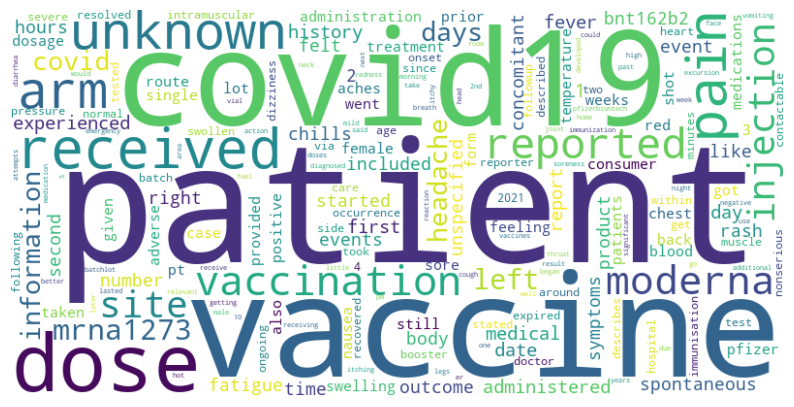

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
#set to english
stopWords=set(stopwords.words('english')) | set(string.punctuation)
#tokenize
def tokenize_and_count(text):
    allWords=[]
    for text in text.dropna():
        words=text.split()
        filteredWords=[word for word in words if word not in stopWords]
        allWords.extend(filteredWords)
    return Counter(allWords)

wordCounts=tokenize_and_count(workData['SYMPTOM_TEXT'])
mostCommon=wordCounts.most_common(15)
print("15 most commpn word")
for word, count in mostCommon:
    print(f"{word}: {count}")

#base wordcloud use
vacclude=WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordCounts)
plt.figure(figsize=(10, 8))
plt.imshow(vacclude, interpolation='bilinear')
plt.axis('off')
plt.show()


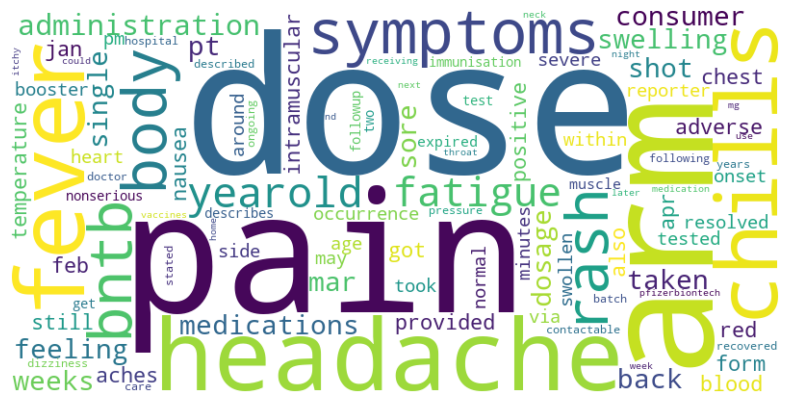

In [9]:
import re
#stopwords that manually select from world cloud and get rid of vaccine names for better see symptoms
custom_stopwords={
    'reported', 'day', 'days', 'experienced', 'included', 'felt','does',
    'started', 'like', 'second', 'time', 'since', 'administered','yearsold','went','unspecified',
    'product', 'events', 'case', 'unknown', 'spontaneous', 'considered','concomitant','route','treatment',
    'female', 'male', 'lot', 'vial', 'prior', 'given', 'patients','bntb ',
    'number', 'date', 'report', 'patient', 'received', 'information','event','weeks ','hours','consumer ','report',
    'outcome', 'first', 'medical', 'history',"vaccine", "vaccination", "injection","site","right","left",
    "moderna", "bnt162b2", "mrna", "mrna-1273", "side effect","reaction","pfizer","covid","covid-19"
}
stopWords.update(custom_stopwords)
#remove non alphabetic characters
def clean_text(text):
    text=re.sub(r'[^a-zA-Z\s]', '', text)  
    return text.lower()
workData['cleanSymptomText']=workData['SYMPTOM_TEXT'].apply(
    lambda x: clean_text(x) if pd.notnull(x) else ''
)
#special filtered text only for this wordcloud for better see symptoms
workData['SpecailFilter']=workData['cleanSymptomText'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stopWords])
)

symptomWordclud=Counter(' '.join(workData['SpecailFilter']).split())
final_wordcloud=WordCloud(
    width=800, height=400, background_color='white', colormap='viridis', max_words=100
).generate_from_frequencies(symptomWordclud)
plt.figure(figsize=(10, 5))
plt.imshow(final_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


This above data wordcloud is only for helps gets symptom text from data, the modify column will not affect future data 

Data looks very clean for now, get rid of the commone stop word, the covid 19 related word. more focuse on the symptom related terms like pain, headache, fever etc. 


Milestone 2 finish symptom_text cleaning ready for filter with NLP model

In [10]:
#import library
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

c:\Users\ruitongs\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
#randomly sample 20000 rows, change the number if you have better computer power. 
choiseSimple=workData.sample(n=20000, random_state=42)
startData=choiseSimple

analysis 

In [12]:
import pandas as pd
#Load model and tokenizer, code from https://huggingface.co/dmis-lab/biobert-base-cased-v1.1
model_name="dmis-lab/biobert-base-cased-v1.1"
tokenizer=AutoTokenizer.from_pretrained(model_name)
model=AutoModel.from_pretrained(model_name)

#manual select word and simlier word given by chatgpt
symptom_related_words={
    "fever", "chills", "headache", "nausea", "vomiting", "fatigue", "pain",
    "muscle pain", "joint pain", "shortness of breath", "cough", "chest pain",
    "injection site pain", "sore throat", "runny nose", "loss of taste", "loss of smell",
    "rash", "redness", "swelling", "dizziness", "weakness", "abdominal pain",
    "diarrhea", "anaphylaxis", "palpitations", "sweating", "swollen lymph nodes",
    "tiredness", "arm pain", "difficulty breathing", "blood clots", "brain fog",
    "skin discoloration", "itching", "hives", "feeling unwell", "dry cough",
    "persistent chest discomfort", "blurred vision", "sensitivity to light",
    "laryngitis", "dry mouth", "loss of appetite", "weight loss", "weight gain",
    "malaise", "chest tightness", "low-grade fever", "sinus congestion", "body aches",
    "wheezing", "night sweats", "tingling sensation", "burning sensation",
    "pale or blue-colored skin", "hoarseness", "difficulty concentrating", 
    "sleep disturbances", "eye pain", "sore or irritated eyes", "ear pain",
    "numbness or tingling", "excessive fatigue", "muscle weakness", "heart inflammation",
    "myocarditis", "pericarditis", "spike in blood pressure", "thrombocytopenia",
    "deep vein thrombosis", "pulmonary embolism", "multisystem inflammatory syndrome",
    "delirium", "seizures", "stroke-like symptoms", "rapid heart rate",
    "low oxygen levels", "cyanosis", "hypercoagulability", "kidney pain", "dark-colored urine",
    "vomiting blood", "intestinal bleeding", "neuropathy", "facial swelling", "puffy eyes",
    "difficulty walking", "loss of balance", "neurological symptoms", "brain swelling",
    "partial paralysis", "prolonged fever", "allergic reactions", "autoimmune reactions",
    "irregular heartbeat", "cardiac arrest"
}

#code given by chatgpt for embeddings for biobert
def get_embeddings(text):
    inputs=tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs=model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()
# Compute symptom-related embeddings
symptomEmbeddings=[get_embeddings(word) for word in symptom_related_words]
# similarity funtion given from chatGpt
def compute_similarity(text):
    if pd.isnull(text):
        return None, None
    text_embedding=get_embeddings(text)
    similarities=[cosine_similarity(text_embedding, word_embedding)[0][0] for word_embedding in symptomEmbeddings]
    max_similarity=max(similarities)
    most_similar_word=list(symptom_related_words)[np.argmax(similarities)]
    return max_similarity, most_similar_word
#use computer similarity on the dataset
choiseSimple[['SIMILARITY', 'targetSymptom']]=choiseSimple['cleanSymptomText'].apply(
    lambda x: pd.Series(compute_similarity(x))
)
#finding text that related to the given symptoms
threshold=0.8 
extractSymptomData=choiseSimple[choiseSimple['SIMILARITY'] > threshold]
print(f"Number of symptom-related rows: {extractSymptomData.shape[0]}")
print(extractSymptomData[['SYMPTOM_TEXT', 'SIMILARITY', 'targetSymptom']].head())

c:\Users\ruitongs\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\ruitongs\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\modeling_utils.py:460: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mod

Number of symptom-related rows: 9218
                                            SYMPTOM_TEXT  SIMILARITY  \
33553  systemic allergic anaphylaxismedium systemic a...    0.811088   
9427   body aches that have persisted for 3 weeks  si...    0.807044   
199    pt developed urticaria swelling three days aft...    0.827829   
39489  individual was under 18 at the time of vaccina...    0.807783   
36958                          body ache chills sore arm    0.928862   

              targetSymptom  
33553  deep vein thrombosis  
9427   deep vein thrombosis  
199    autoimmune reactions  
39489            laryngitis  
36958            body aches  


In [13]:
for t in [0.7, 0.8, 0.9]:
    sample = choiseSimple[choiseSimple['SIMILARITY'] > t]
    print(f"Threshold {t}: {sample.shape[0]} rows")
    print(sample[['SYMPTOM_TEXT', 'SIMILARITY', 'targetSymptom']].head())


Threshold 0.7: 19692 rows
                                            SYMPTOM_TEXT  SIMILARITY  \
33553  systemic allergic anaphylaxismedium systemic a...    0.811088   
9427   body aches that have persisted for 3 weeks  si...    0.807044   
199    pt developed urticaria swelling three days aft...    0.827829   
12447  two days after the shot my right armpit is swo...    0.757264   
39489  individual was under 18 at the time of vaccina...    0.807783   

              targetSymptom  
33553  deep vein thrombosis  
9427   deep vein thrombosis  
199    autoimmune reactions  
12447  deep vein thrombosis  
39489            laryngitis  
Threshold 0.8: 9218 rows
                                            SYMPTOM_TEXT  SIMILARITY  \
33553  systemic allergic anaphylaxismedium systemic a...    0.811088   
9427   body aches that have persisted for 3 weeks  si...    0.807044   
199    pt developed urticaria swelling three days aft...    0.827829   
39489  individual was under 18 at the time of va

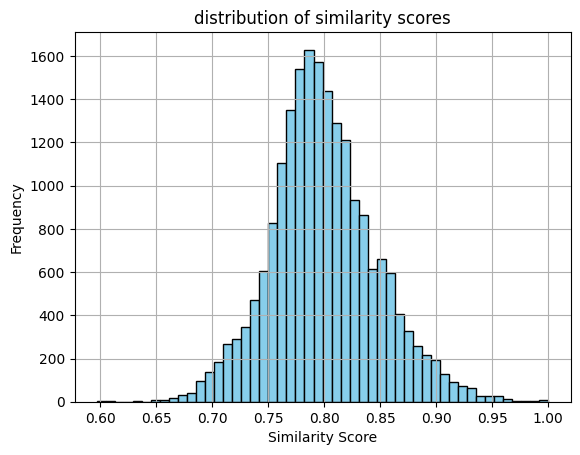

In [14]:
import matplotlib.pyplot as plt

plt.hist(choiseSimple['SIMILARITY'].dropna(), bins=50,color='skyblue',edgecolor='black')
plt.title("distribution of similarity scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [15]:
unique_covered = choiseSimple[choiseSimple['SIMILARITY'] > threshold]['targetSymptom'].nunique()
total_symptoms = len(symptom_related_words)
coverage = unique_covered / total_symptoms * 100
print(f"Symptom Coverage: {coverage:.2f}% ({unique_covered} out of {total_symptoms})")


Symptom Coverage: 75.26% (73 out of 97)


most common word
targetSymptom
body aches                   1332
chest tightness              1118
intestinal bleeding           874
pale or blue-colored skin     839
deep vein thrombosis          663
numbness or tingling          594
vomiting blood                459
spike in blood pressure       443
skin discoloration            433
low-grade fever               372
Name: count, dtype: int64


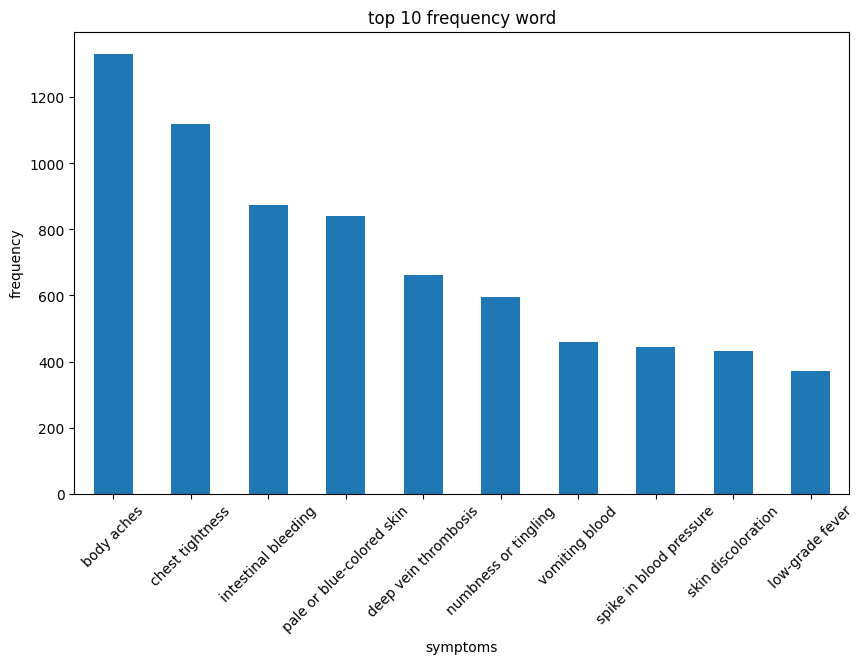

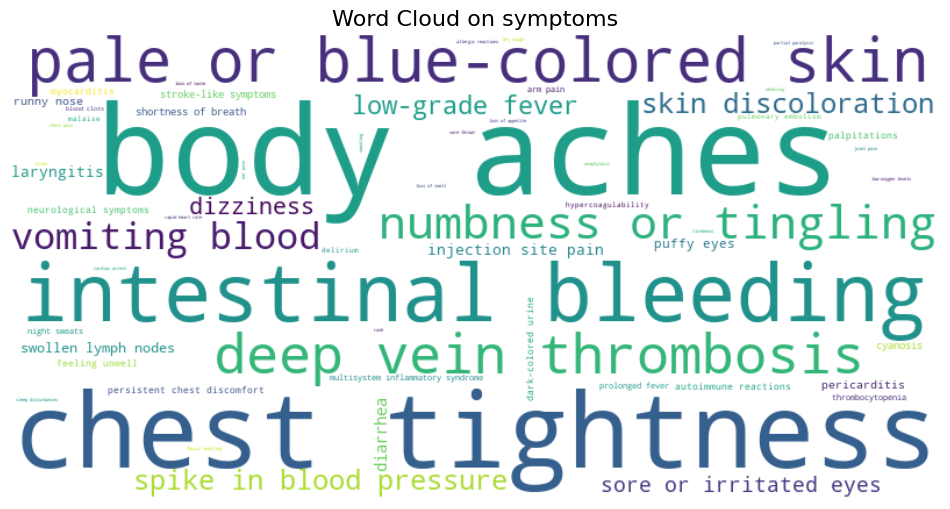

In [16]:
import matplotlib.pyplot as plt
#word count 
symptomWord=extractSymptomData['targetSymptom'].value_counts()
#print most common word
print("most common word")
print(symptomWord.head(10))
plt.figure(figsize=(10, 6))
symptomWord.head(10).plot(kind='bar')
plt.title("top 10 frequency word")
plt.xlabel("symptoms")
plt.ylabel("frequency")
plt.xticks(rotation=45)
plt.show()

#wordcloud plot
from wordcloud import WordCloud
wordcloud=WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    symptomWord
)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud on symptoms", fontsize=16)
plt.show()


total Records: 20000
idenifyed symptoms: 9218
symptoms percentage: 46.09%


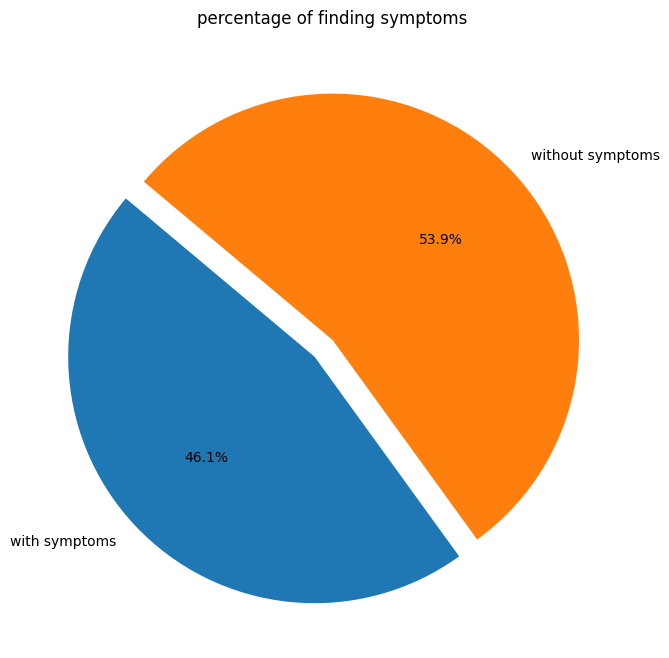

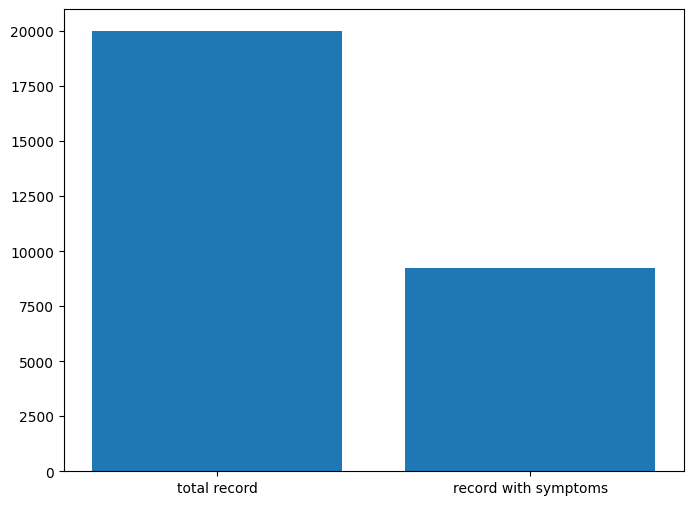

In [17]:
totalDataRow=startData.shape[0]
TotalsymptomForplot=extractSymptomData.shape[0]
#find percentage 
piePlotData=(TotalsymptomForplot / totalDataRow)*100
#data summary
print(f"total Records: {totalDataRow}")
print(f"idenifyed symptoms: {TotalsymptomForplot}")
print(f"symptoms percentage: {piePlotData:.2f}%")
#plot pie chart
plt.figure(figsize=(8, 8))
labels=['with symptoms', 'without symptoms']
sizes=[TotalsymptomForplot, totalDataRow - TotalsymptomForplot]
explode=(0.1, 0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', startangle=140)
plt.title("percentage of finding symptoms")
plt.show()
#plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(['total record', 'record with symptoms'], [totalDataRow, TotalsymptomForplot])
plt.show()


In [18]:
extractSymptomData.to_csv("extractSymptomsReadforTime.csv", index=False)

In [19]:
hourdata=extractSymptomData

In [20]:
import spacy
from spacy.matcher import Matcher
from word2number import w2n
nlp=spacy.load("en_core_web_sm")
matcher=Matcher(nlp.vocab)
#pattern made by chatgpt
pattern=[
    {"TEXT": {"REGEX": r"\b(?:one|two|three|four|five|six|seven|eight|nine|ten|\d+)\b"}}, 
    {"LOWER": {"IN": ["hour", "hours", "day", "days", "week", "weeks", "month", "months", "year", "years"]}}
]
matcher.add("TIME_PATTERN", [pattern])
def findHour(text):
    findtext=nlp(text)
    matches=matcher(findtext)
    if matches:
        match_id, start, end=matches[0]
        timeTextfromNLP=findtext[start:end].text.lower()
        parts=timeTextfromNLP.split()
        if len(parts) == 2:
            try:
                #use w2n to change number in word to numbers
                value=w2n.word_to_num(parts[0]) if parts[0].isalpha() else int(parts[0])
                hourFind=parts[1]
                if "hour" in hourFind:
                    hours=value
                elif "day" in hourFind:
                    hours=value*24
                elif "week" in hourFind:
                    hours=value*7*24
                elif "month" in hourFind:
                    hours=value*30*24
                elif "year" in hourFind:
                    hours=value*365*24
                else:
                    hours=1 
                    #at least 1 is return no negative
                return max(hours, 1)
            except ValueError:
                return None #make sure no error
    return None

# adding new timeinText collum 
hourdata['timeinTEXT']=hourdata['SYMPTOM_TEXT'].apply(findHour)
print(hourdata[['SYMPTOM_TEXT', 'timeinTEXT']].head())
hourdata.to_csv('symptomwithTime.csv', index=False)


                                            SYMPTOM_TEXT  timeinTEXT
33553  systemic allergic anaphylaxismedium systemic a...         NaN
9427   body aches that have persisted for 3 weeks  si...       504.0
199    pt developed urticaria swelling three days aft...        72.0
39489  individual was under 18 at the time of vaccina...         NaN
36958                          body ache chills sore arm         NaN


C:\Users\ruitongs\AppData\Local\Temp\ipykernel_6824\2413563797.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourdata['timeinTEXT']=hourdata['SYMPTOM_TEXT'].apply(findHour)


In [21]:
#print result for ppt
print(hourdata[['SYMPTOM_TEXT', 'timeinTEXT']].sample(n=20, random_state=42))

                                            SYMPTOM_TEXT  timeinTEXT
27735  hospitalized with covid fully vaccinated with ...         NaN
41039  pfizer vaccine administered after being stored...         NaN
11237   headache nausea and vomiting  sleep and ibupofen         NaN
48425                 error improper storage temperature         NaN
7414                                admitted to hospital         NaN
9855   pfizer vaccine administered after being stored...         NaN
7091   moderna covid19 vaccine eua tenderness and swe...         NaN
31181  pfizerbiontech covid19 vaccine eua muscle ache...         NaN
9281                        body aches fatigue headaches         NaN
1061   1 week later large red spot around injection s...       168.0
45693  gradual onset of diarrhea and fever 2 days aft...        48.0
9620   normal labor and delivery on 11222021 hospital...      1008.0
24612  had some itching and swelling after administra...         NaN
27651  patient had an ed visit and

In [22]:
hournum=hourdata

In [23]:
#funtion find if there is no timeintext use date info to find hour
def calculate_hours(row):
    if pd.notnull(row['timeinTEXT']) and str(row['timeinTEXT']).isdigit():
        return int(row['timeinTEXT'])
    elif pd.notnull(row['VAX_DATE']) and pd.notnull(row['ONSET_DATE']):
        try:
            vax_date=pd.to_datetime(row['VAX_DATE'], errors='coerce')
            onset_date=pd.to_datetime(row['ONSET_DATE'], errors='coerce')
            if pd.notnull(vax_date) and pd.notnull(onset_date):
                time_difference=(onset_date - vax_date).total_seconds()/3600
                return 12 if time_difference == 0 else max(1, int(time_difference)) #if in the same date see at as 12 hour
        except Exception:
            pass
    return None #return none make sure no error
hournum['hour']=hournum.apply(calculate_hours, axis=1)
hournum.to_csv("finalDataForPlot.csv")



C:\Users\ruitongs\AppData\Local\Temp\ipykernel_6824\1166748407.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hournum['hour']=hournum.apply(calculate_hours, axis=1)


C:\Users\ruitongs\AppData\Local\Temp\ipykernel_6824\1827167670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hournum['hourGroup']=pd.cut(hournum['hour'], bins=hour_bins, labels=hourRange, right=False)
C:\Users\ruitongs\AppData\Local\Temp\ipykernel_6824\1827167670.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  symptombytime=hournum.groupby(['hourGroup', 'targetSymptom']).size().unstack(fill_value=0)


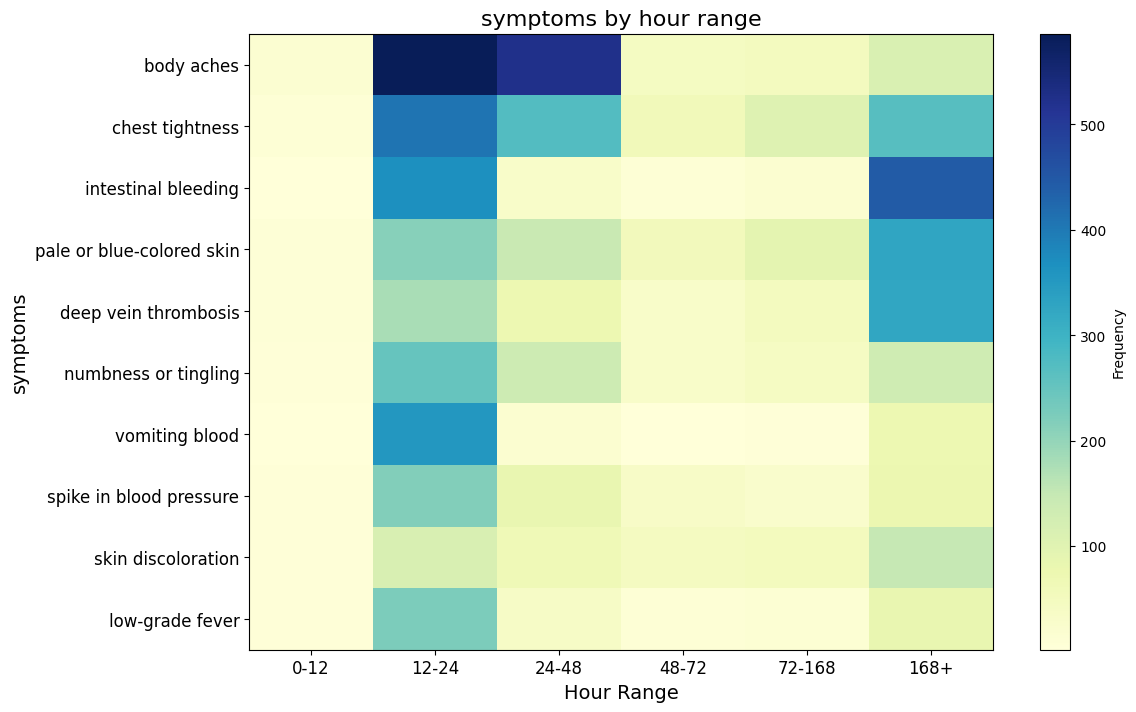

In [24]:
hour_bins=[0, 12, 24, 48, 72, 168, hournum['hour'].max()]  #making labels for hours till 1 week
hourRange=['0-12', '12-24', '24-48', '48-72', '72-168', '168+']
hournum['hourGroup']=pd.cut(hournum['hour'], bins=hour_bins, labels=hourRange, right=False)
#plot heat map by realtionship between hour and symptoms
symptombytime=hournum.groupby(['hourGroup', 'targetSymptom']).size().unstack(fill_value=0)
topSymptomWord=hournum['targetSymptom'].value_counts().head(10).index
symptombytime=symptombytime[topSymptomWord]

#plot a heatmap for top symptoms by hour ranges
plt.figure(figsize=(12, 8))
plt.imshow(symptombytime.T, aspect='auto', cmap='YlGnBu', interpolation='nearest')
plt.colorbar(label='Frequency')
plt.title('symptoms by hour range', fontsize=16)
plt.xlabel('Hour Range', fontsize=14)
plt.ylabel('symptoms', fontsize=14)
plt.xticks(ticks=np.arange(len(hourRange)), labels=hourRange, fontsize=12)
plt.yticks(ticks=np.arange(len(topSymptomWord)), labels=topSymptomWord, fontsize=12)
plt.show()


<Figure size 1200x600 with 0 Axes>

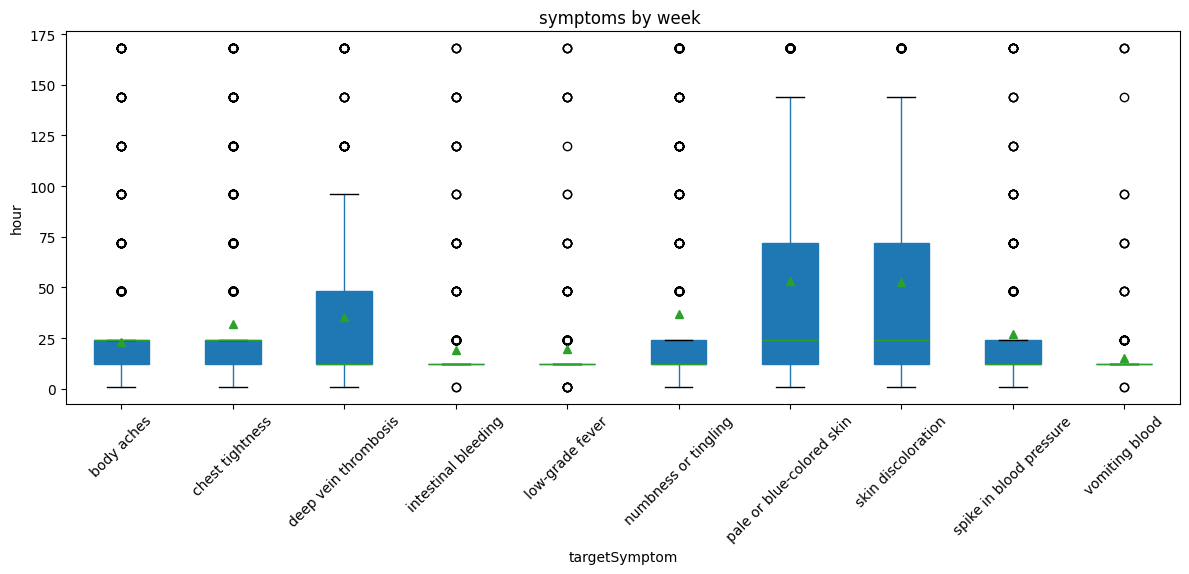

In [25]:
#filter the data by week 
symptomsByWeek=hournum[hournum['hour'] <= 168]
topSymptomInweek=symptomsByWeek['targetSymptom'].value_counts().head(10).index
plotdatainWeek=hournum[
    (hournum['targetSymptom'].isin(topSymptomInweek)) & (hournum['hour'] <= 168)
]
#plot the data 
plt.figure(figsize=(12, 6))
plotdatainWeek.boxplot(
    column='hour',
    by='targetSymptom',
    grid=False,
    rot=45,
    patch_artist=True,
    showmeans=True,
    figsize=(12, 6),
)
plt.title('symptoms by week ')
plt.suptitle('')
plt.ylabel('hour')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

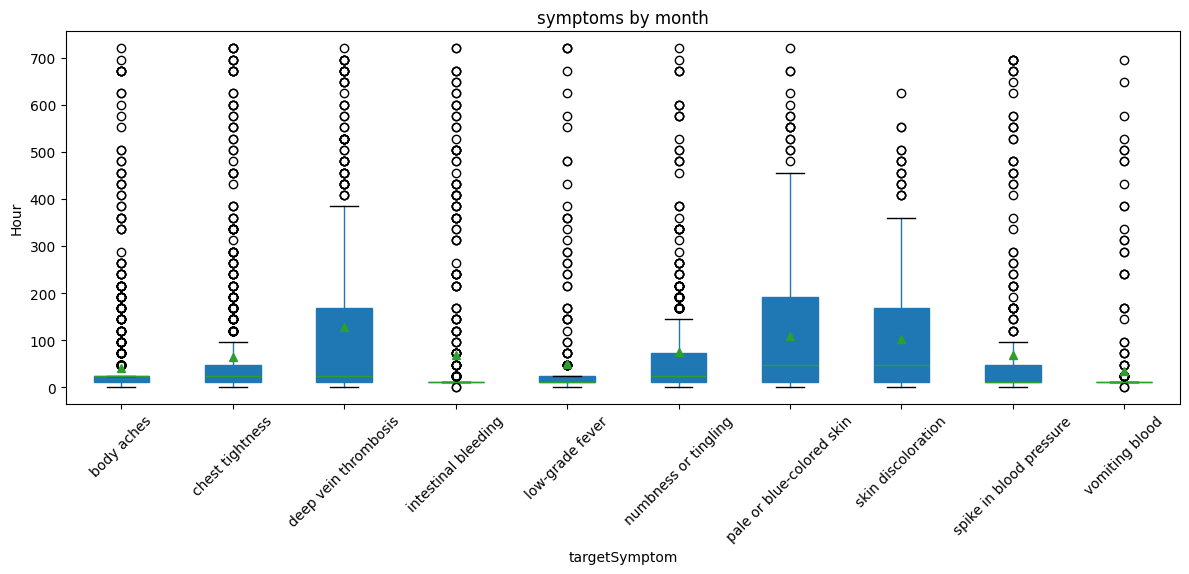

In [26]:
#filter the data in a month 
symptomsBymonth=hournum[hournum['hour'] <= 720]
# find top 10 symptom in month range
topSymptomInmonth=symptomsBymonth['targetSymptom'].value_counts().head(10).index
monthplotdata=hournum[
    (hournum['targetSymptom'].isin(topSymptomInmonth)) & (hournum['hour'] <= 720)
]
plt.figure(figsize=(12, 6))
monthplotdata.boxplot(
    column='hour',
    by='targetSymptom',
    grid=False,
    rot=45,
    patch_artist=True,
    showmeans=True,
    figsize=(12, 6),
)
plt.title('symptoms by month')
plt.suptitle('')
plt.ylabel('Hour')
plt.tight_layout()
plt.show()
